C:\Users\TermnL\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\TermnL\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\TermnL\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\TermnL\miniconda


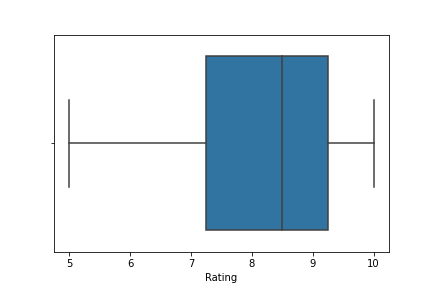
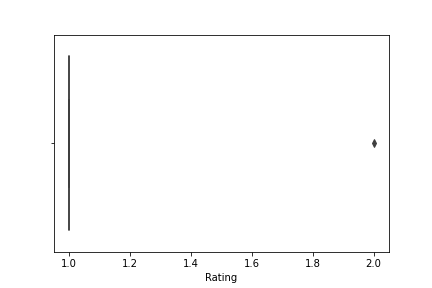
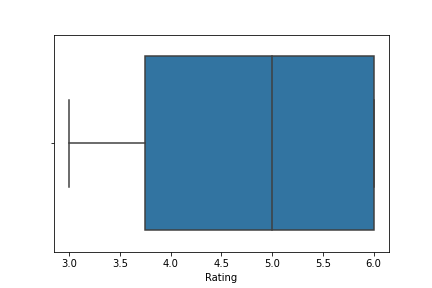
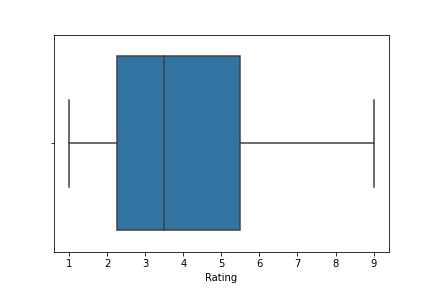
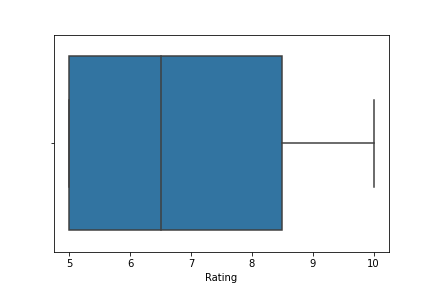
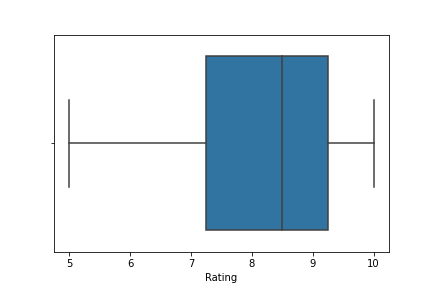

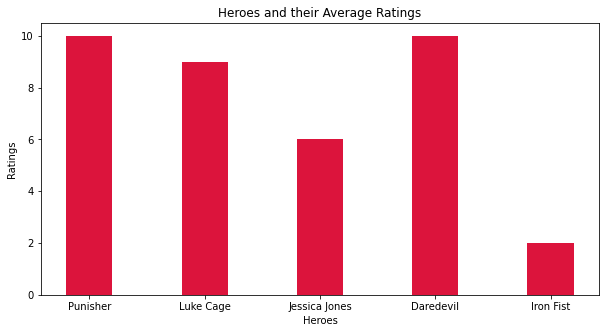

In [9]:
#this project with tie in previous concepts of data management, filtering, visual encoding, color styling, interactivity,
#and dashboarding.

#https://youtu.be/kgdJXN-M3g0 <<<<link to video on this project

#TWEAK the code below to make the following changes:
#1) add a different data source instead of animal and rating, using anything else.  You can either
#     directly type data in or load a dataframe from a csv
#2) add an additional visualisation.  it can be a bar chart, column chart, line chart, anything really.  Do not remove 
#     the existing bar chart.  
#3) conform to a company's marketing / recommended color requirements and share the link to the palette in your code.
#4) submit your homework as a link to your github ipynb page.

import param
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import panel as pn
import numpy as np
pn.extension()

# make plots static
%matplotlib inline

# change the dataset to your own data.  it can be ANYTHING, as long as you can make a dashboard from it.
#use different data!
df = pd.DataFrame({'Hero':['Punisher', 'Punisher' ,'Luke Cage', 'Jessica Jones', 'Daredevil', 'Iron Fist', 'Jessica Jones', 'Luke Cage', 
                             'Iron Fist', 'Daredevil', 'Punisher', 'Jessica Jones', 'Iron Fist', 'Luke Cage', 'Daredevil', 'Luke Cage',
                            'Punisher', 'Daredevil', 'Jessica Jones', 'Luke Cage', 'Luke Cage', 'Iron Fist', 'Iron Fist'], 
                   'Rating':[10, 8, 6, 6, 9, 1, 4, 1, 
                             1, 8, 5, 6, 2, 4, 10, 9,
                            5, 5, 3, 2, 3, 1, 1]})
# create a class containing an animal selector drop-down, various plots, and a data table output
class RatingsDashboard(param.Parameterized):
    
    # drop down selector widget containing the list of animals, with the default being 'Goat'
    Hero = param.ObjectSelector(default='Daredevil', objects=list(df.Hero.unique()))
    
    # create data set containing only the data applicable to the animal in the drop down selector
    def get_data(self):
        class_df = df[(df.Hero == self.Hero)].copy()
        return class_df
    
    # seaborn box plot for the chosen animal
    #Add another visualization!
    #change the color! Find a companies branding website and use their approved HEX code, RGB
    #example of color branding here: https://marketing.illinois.edu/visual-identity/color
    
    def box_view(self):
        data = self.get_data() 
        ax = sns.boxplot(data['Rating'])
        plt.close()
        return ax.figure

    
    # table of data for the chosen animal
    def table_view(self):
        data = self.get_data()
        return data

# create an instance of the class
rd = RatingsDashboard(name='')

# create a title for the dashboard
dashboard_title = '# Hero Ratings Dashboard'

# create some text describing the dashboard
dashboard_desc = 'An example of a simple interactive HoloViz Panel dashboard ratings of Marvel Heroes.'

# create a dashboard, defining the layout as one column containing the
# dashboard title, dashboard description, 'Animal' drop down selector,
# box plot, and data table
dashboard = pn.Column(dashboard_title, 
                      dashboard_desc,   
                      rd.param,       # 'Animal' drop down selector
                      rd.box_view,    # box plot
                      rd.table_view   # data table
                     )

dashboard.embed(max_opts = 5)

# Bar Plot of the Heroes and their Ratings

heroes = df.Hero
rate = df.Rating
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(heroes, rate, color ='crimson', 
        width = 0.4)
 
plt.xlabel("Heroes")
plt.ylabel("Ratings")
plt.title("Heroes and their Average Ratings")
plt.show()